<h1>Downloads and Plots 30 years (1990-2020) of ATMOS Quality Controlled 60-m Tower Data

<h3> Jack Colwell and Sujan Pal
    
    Data from: https://www.atmos.anl.gov/ANLMET/text/

## Imports

In [104]:
import numpy as np
import pandas as pd
import time
from datetime import timedelta, date
import wget
import matplotlib.pyplot as plt
import requests 
import os, glob
import re
import datetime 
import itertools
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

<h2> Definitions and Downloads the QCd Data

In [105]:
#This defines the client making the request and allows you to actually download the data. It shares details about the clients operating system and browser. 
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36'}

In [106]:
# Download Quality controlled data from ATMOS 60-m Tower
months = ["jan", "feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

In [107]:
#This defines the url that the code will download the data from
base_url = 'https://www.atmos.anl.gov/ANLMET/text/'

In [108]:
#This defines the directory to which the data will be saved
outdir= 'C:\\Users\\colwe\\OneDrive\\Desktop\\Argonne\\ATMOS_Tower_Data\\atmos-tower-data\\QC_Txt_Files'

In [ ]:
#This defines which year to start from when it starts downloading the data
year = 1990

#This is saying while the year is less than 2021 (this allows one to get a dataset for 30 years)
while year < 2021:
    
    #This prints while it is cycling through the year, that way one knows that it is downloading correctly
    print('downloading data for year',year)
    
    #This starts the for loop for the months, defined above
    for month in months:
        
        #This defines what the file name will look like
        to_download = base_url + str(year) + '/' + month + str(year)[-2:] + 'met.sum'
        
        #This .get function accesses the .sum files
        response = requests.get(to_download)
        
        #If the status code gives a 200 (meaning it is downloading correctly then it will open the file and write it to the correct directory)
        if response.status_code == 200:
            with open(f'{outdir}/atmos-tower-{year}-{month}.txt', 'wb') as file:
                file.write(response.content)     
        
        #If the status code gives a 404 error then it will open the file and try to download it as a .data instead of a .sum
        elif response.status_code ==  404:
            to_download = base_url + str(year)
            + '/' + month + str(year)[-2:] + 'met.data'
            response = requests.get(to_download, headers=headers)
            with open(f'{outdir}/atmos-tower-{year}-{month}.txt', 'wb') as file:
                file.write(response.content)
        
        #Else it wll print which file it is having an error when trying to downlaoding
        else:
            print(f'Error downloading {month}{year}met.data. Status code: {response.status_code}')            
    
    #This iterates the year by 1 until 2020
    year+=1

<h2> Formats the Columns and Data Correctly

In [109]:
#This defines months again
months = ["jan", "feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

In [110]:
#This creates an array with number 1-12, basically numbers the months
months_number = np.arange(1,13)

In [111]:
#This defines the column names for the data
col_names = ['time','AT60','WS60','WD60','WD_STD60','RH10','DP10','AT10','WS10','WD10','WD_STD10','ST10cm','ST1m','ST10ft','Pressure','RS','RN','Precip','z/l','stability']

In [112]:
# This array stores the days when data is present 
days = [] 

In [113]:
#Thus array stores hourly data
metdata = [] 

In [127]:
#This starts a for loop for the years 1990-2020
for year in range(1990,2021):
    
    #This prints a statement so you know that it is working
    print('reading data from year',year)
    
    #This for loop iterates over each months (probably not needed)
    for i in range(len(months)):
        
        #print(months[i])
        filename = 'C:\\Users\\colwe\\OneDrive\\Desktop\\Argonne\\ATMOS_Tower_Data\\atmos-tower-data\\QC_Txt_Files\\'+ str('atmos-tower') + '-' + str(year) + '-' + months[i] + '.txt'
        
        #This opens the file as f, to later be operated on
        with open(filename) as f:
            
            #This strips a line in a file if the (length of the line is equal to 8)
            for line in f:
                
                #It specifically strips any white/blank space
                line=line.strip()
                if len(line) == 8: 
                    
                    # Do not read daily or hourly averages at the end of each file, so it breaks and moves on
                    break 
                    
                #Else if the characters in the line matched what is defined below using a regular expression then it will split the line     
                elif re.match(r"^\d+.*$",line):
                    nl = line.split()
                    
                    #If the lengths of the line that are being split is less than 10 then it will format the day as defined below
                    if len(nl) < 10:
                        day = str(months_number[i])+'/'+nl[0]+'/'+str(year)
                        
                        #This appends all the days together
                        days.append(day)
                        
                    #If the lines that are being split are greater than 10 then it will append them to metdata
                    elif len(nl) > 10:
                        metdata.append(nl) 

reading data from year 1990
reading data from year 1991
reading data from year 1992
reading data from year 1993
reading data from year 1994
reading data from year 1995
reading data from year 1996
reading data from year 1997
reading data from year 1998
reading data from year 1999
reading data from year 2000
reading data from year 2001
reading data from year 2002
reading data from year 2003
reading data from year 2004
reading data from year 2005
reading data from year 2006
reading data from year 2007
reading data from year 2008
reading data from year 2009
reading data from year 2010
reading data from year 2011
reading data from year 2012
reading data from year 2013
reading data from year 2014
reading data from year 2015
reading data from year 2016
reading data from year 2017
reading data from year 2018
reading data from year 2019
reading data from year 2020


In [128]:
#This creates the pandas dataframe, defines which data to use, and how to title the columns                       
all_data = pd.DataFrame(metdata,columns=col_names)

<h2> Creates Data and Time Columns for the Dataframe

In [129]:
#Creates list of days for the dataframe, the iterator iterates over 24 hours in day
#The 'for x in days' section iterates over each day in the list of days
#The itertools.chain.from_iterable merges the iterators, to create a single iterator
#day_list creates a list from the iterator
day_list = list(itertools.chain.from_iterable(itertools.repeat(x, 24) for x in days))

#Creates timestamp objects
day_list = pd.to_datetime(day_list)

In [130]:
#np.arrange creates an array from 0-23 representing the 24 hours in a day
#.astype converts the integers to strings so that they can be operated upon
#.str.zfill makes sure each hour is represented by a 2 digit integer
hours_str = pd.Series(np.arange(0,24)).astype(str).str.zfill(2)

#Converts the hours_str series to a list
#Multiplyting allows the list (hours_str) to be applied to the length of days in the list of days
hours_list = list(hours_str)*len(days)

In [131]:
#Add date and time to the dataframe
all_data['Date'] = pd.to_datetime(day_list, format='%m/%d/%Y', exact=False)
all_data['Time'] = hours_list  

#This concatenates the date and time together
all_data['datetime'] = pd.to_datetime(all_data['Date'].astype(str) + ' ' + all_data['Time'].astype(str))

#Sets the index for the dataframe
all_data = all_data.set_index('datetime')

#Shifts the datetime to match with web format, 2400 is next day 0000
final_df = all_data.shift(1, freq='H') 

<h2> Cleans up Data for Plotting

In [132]:
final_df.index.drop_duplicates() 

DatetimeIndex(['1990-01-01 01:00:00', '1990-01-01 02:00:00',
               '1990-01-01 03:00:00', '1990-01-01 04:00:00',
               '1990-01-01 05:00:00', '1990-01-01 06:00:00',
               '1990-01-01 07:00:00', '1990-01-01 08:00:00',
               '1990-01-01 09:00:00', '1990-01-01 10:00:00',
               ...
               '2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=271584, freq=None)

In [133]:
#This gets rid of rows that contain *, ^, and ?, that way the only values that are displayed are certain values
final_df = final_df[~final_df["Precip"].str.contains('\*')]
final_df = final_df[~final_df["Precip"].str.contains('\^')]
final_df = final_df[~final_df["Precip"].str.contains('\?')]

#This converts the data type to float
final_df['Precip'] = final_df['Precip'].astype(float)

#This line drops the precip rows over 100, this adds extra quality control to the data
final_df.drop(final_df[final_df['Precip'] >= 80].index, inplace = True)

<h2> Plots Hourly Precipitation

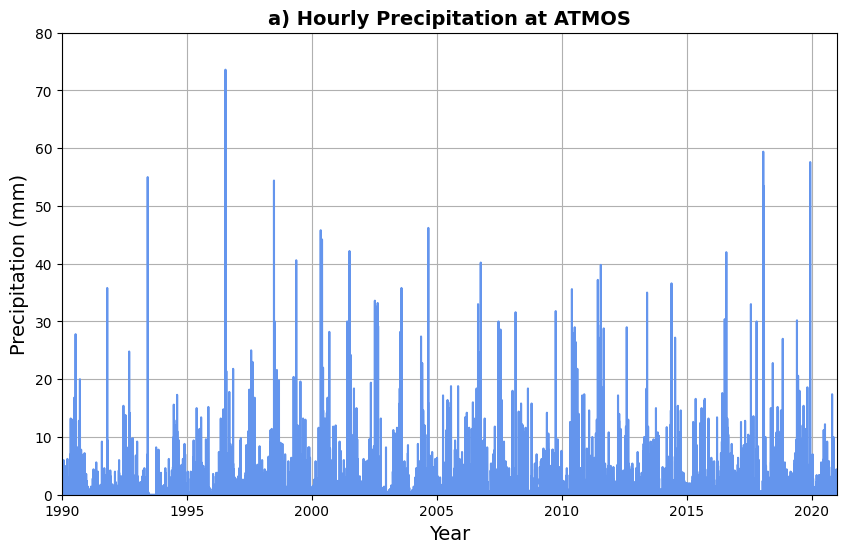

In [121]:
#Defines the directory where you want to save the figure
save_directory = r'C:\Users\colwe\OneDrive\Desktop\Argonne\ATMOS_Tower_Data\Precip_Figures'

#Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

#Filter the data for the desired range
start_date = pd.Timestamp('1990-01-01')
end_date = pd.Timestamp('2020-12-31')

#This requires both conditions to be true and then filters the data that way
filtered_df = final_df.loc[(final_df.index >= start_date) & (final_df.index <= end_date)]

#Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#Plot the filtered data
ax1.plot(filtered_df.index, filtered_df['Precip'].values, label="Precipitation", color='cornflowerblue')

#Set the y-axis label
ax1.set_ylabel('Precipitation (mm)', fontsize=14)

#Set the x-axis label
ax1.set_xlabel('Year', fontsize=14)

#Set the figure title
ax1.set_title("a) Hourly Precipitation at ATMOS", fontweight="bold", fontsize=14)

#Add a grid to the plot
plt.grid()

#Set the x-axis limits
plt.xlim([start_date, end_date])

plt.ylim([0,80])

#Set the tick locator on the x-axis every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(base=5))

#Set the tick format on the x-axis as years
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#Set the tick labels rotation in degrees
plt.xticks(rotation=0)

#Define the filename and full path to save the figure
filename = 'ATMOS_Hourly_Precip_1.png'
save_path = os.path.join(save_directory, filename)

# aves the figure as a .png in the specified directory
plt.savefig(save_path, dpi=300)

#Show the plot
plt.show()

#Delay to allow the plot to fully render
time.sleep(1)

<h2> Plots Average Daily Precipitation

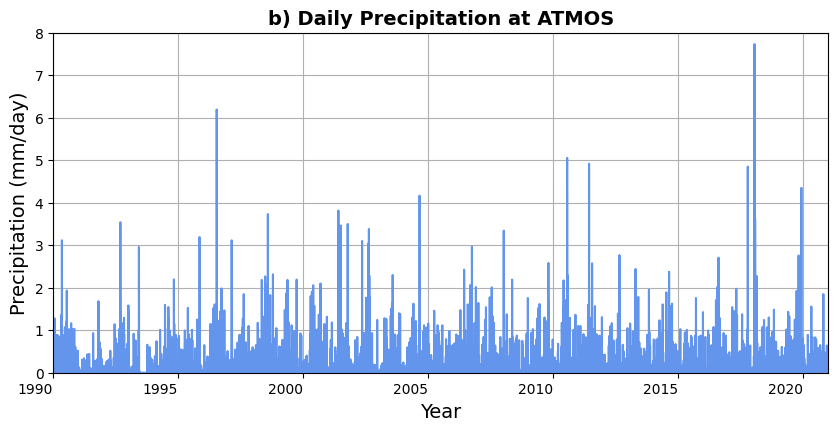

In [122]:
#This creates a new figure and an axes object
#This sets the figure size
fig, ax1 = plt.subplots(figsize=(10, 5))

#By including ['Precip'] it allows the code to select that specific column out of the dataframe to perform an operation on
#.resample D allows the data to be resampled at daily intervals instead of hourly
#.mean() takes the average of all hours in a day, resulting in daily averages
mean_daily_precipitation = final_df['Precip'].resample('D').mean()

# Filter the data to include only values smaller than or equal to 10mm
limited_mean_daily_precipitation = mean_daily_precipitation[mean_daily_precipitation <= 10]


limited_mean_daily_precipitation.plot(ax=ax1, label='Precipitation', color='cornflowerblue')

ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_title("b) Daily Precipitation at ATMOS", fontweight="bold", fontsize=14)
plt.grid()

#Set the x-axis limits
plt.xlim([start_date, end_date])

plt.ylim([0,8])

#Set the tick locator on the x-axis every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(base=5))

#Set the tick format on the x-axis as years
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#Set the tick labels rotation in degrees
plt.xticks(rotation=0)

#Define the filename and full path to save the figure
filename = 'ATMOS_Daily_Avg_Precip_1.png'
save_path = os.path.join(save_directory, filename)

#This saves the figure as a .png in the specified directory
plt.savefig(save_path, dpi=300)

#Filter the original dataframe to exclude daily values above 10mm
final_df = final_df[final_df['Precip'] <= 10]

#Calculates the mean daily precipitation after filtering
mean_daily_precipitation = final_df['Precip'].resample('D').mean()

<h2> Plots Hourly Precipitation and Average Daily Precipitation together in the Same Figure

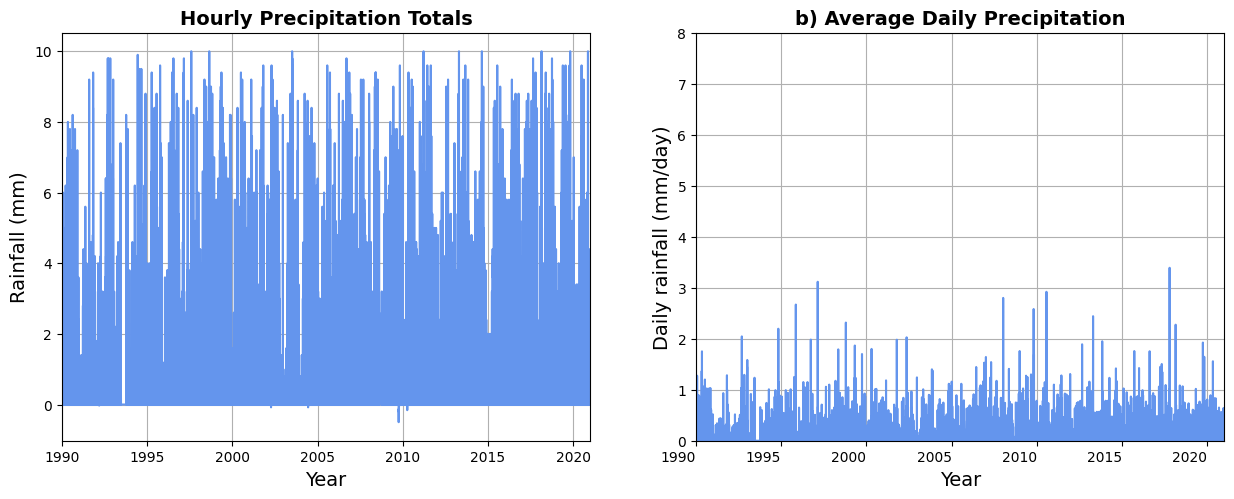

In [123]:
#Defines the directory where you want to save the figure
save_directory = r'C:\Users\colwe\OneDrive\Desktop\Argonne\ATMOS_Tower_Data\Precip_Figures'

#Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

#Filter the data for the desired range
start_date = pd.Timestamp('1990-01-01')
end_date = pd.Timestamp('2020-12-31')

#This requires both conditions to be true and then filters the data that way
filtered_df = final_df.loc[(final_df.index >= start_date) & (final_df.index <= end_date)]

#Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#By using ax1 and ax2 you can add multiple graphs to the same figure

#Plot the hourly precip data - First Graph
ax1.plot(filtered_df.index, filtered_df['Precip'].values, label="Precipitation", color='cornflowerblue')
ax1.set_ylabel('Rainfall (mm)', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_title("Hourly Precipitation Totals", fontweight="bold", fontsize=14)
ax1.grid()
ax1.set_xlim([start_date, end_date])
plt.ylim([1,80])
ax1.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax1.get_xticklabels(), rotation=0)

#By including ['Precip'] it allows the code to select that specific column out of the dataframe to perform an operation on
#.resample D allows the data to be resampled at daily intervals instead of hourly
#.mean() takes the average of all hours in a day, resulting in daily averages
mean_daily_precipitation = final_df['Precip'].resample('D').mean()

#Filter the data to include only values smaller than or equal to 10mm
limited_mean_daily_precipitation = mean_daily_precipitation[mean_daily_precipitation <= 10]

#Plot the average daily precip data - Second Graph
limited_mean_daily_precipitation.plot(ax=ax2, label='Precipitation', color='cornflowerblue')
ax2.set_ylabel('Daily rainfall (mm/day)', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_title("b) Average Daily Precipitation", fontweight="bold", fontsize=14)
ax2.grid()
ax2.set_xlim([start_date, end_date])
plt.ylim([0,8])
ax2.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax2.get_xticklabels(), rotation=0)

#Define the filename and full path to save the figure
filename = 'Hourly_&_Average_Daily.png'
save_path = os.path.join(save_directory, filename)

#Save the figure as a .png in the specified directory
plt.savefig(save_path, dpi=300)

#Show the plot
plt.show()


<h2> Plots Average Daily Precipitation per Year

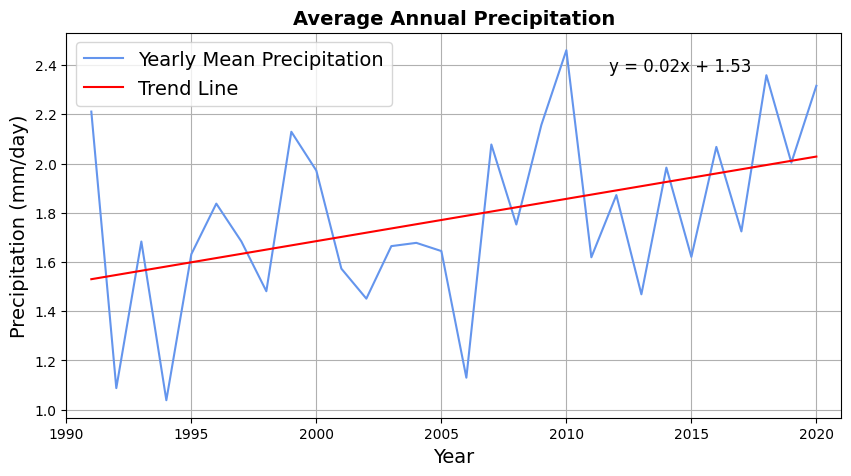

In [124]:
#Filter the data for the desired range
start_date = pd.Timestamp('1990-01-01')
end_date = pd.Timestamp('2020-12-31')

#This requires both conditions to be true and then filters the data that way
filtered_df = final_df.loc[(final_df.index >= start_date) & (final_df.index <= end_date)]

#This creates a new figure and an axes object
#This sets the figure size
fig, ax1 = plt.subplots(figsize=(10, 5))

#Defines the directory where you want to save the figure
save_directory = r'C:\Users\colwe\OneDrive\Desktop\Argonne\ATMOS_Tower_Data\Precip_Figures'

#Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

#Convert the original data from mm/hour to mm/day
daily_mean_precipitation = final_df['Precip'] * 24

#Resample the converted data to yearly means
yearly_mean_precipitation = daily_mean_precipitation.resample('Y').mean()

#Limit the x-axis to the range up to the year 2019
yearly_mean_precipitation = yearly_mean_precipitation[yearly_mean_precipitation.index.year <= 2019]

#Plot the yearly mean precipitation
ax1.plot(yearly_mean_precipitation.index, yearly_mean_precipitation.values, label="Yearly Mean Precipitation", color='cornflowerblue')

#Fit a polynomial regression line (trend line)
#Trend_x create an array of numbers from 0 to the length of the yearly_mean_precipitation 
#This represents the years
trend_x = np.arange(len(yearly_mean_precipitation))


trend_y = np.polyval(np.polyfit(trend_x, yearly_mean_precipitation.values, deg=1), trend_x)
ax1.plot(yearly_mean_precipitation.index, trend_y, label='Trend Line', color='red')

#Sets the y-axis label
ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)

#Sets the x-axis label
ax1.set_xlabel('Year', fontsize=14)

#Sets the figure title
ax1.set_title("Average Annual Precipitation", fontweight="bold", fontsize=14)

#Adds a legend and sets the font size
ax1.legend(fontsize=14)

#Adds a grid to the plot
plt.grid()

#Set the x-axis limits
plt.xlim([start_date, end_date])

#Set the tick locator on the x-axis every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(base=5))

#Set the tick format on the x-axis as years
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#Set the tick labels rotation in degrees
plt.xticks(rotation=0)

#Add the equation of the trend line to the plot
equation = f"y = {np.polyfit(trend_x, yearly_mean_precipitation.values, deg=1)[0]:.2f}x + {np.polyfit(trend_x, yearly_mean_precipitation.values, deg=1)[1]:.2f}"
ax1.annotate(equation, xy=(0.70, 0.90), xycoords='axes fraction', fontsize=12)

#Define the filename and full path to save the figure
filename = 'Average_Daily_Precipiation_per_Year_2.png'
save_path = os.path.join(save_directory, filename)

#Saves the figure as a .png in the specified directory
plt.savefig(save_path, dpi=300)

#Show the plot
plt.show()


<h2> Plots Maximum Hourly Precipitation Rates per Year

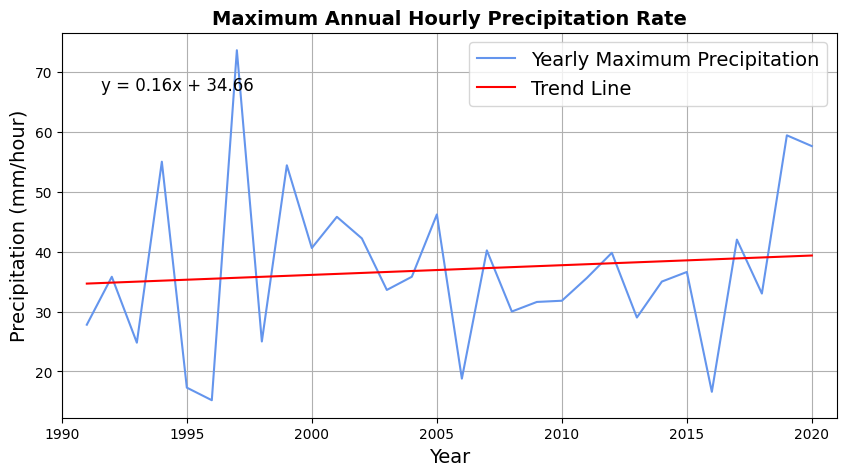

In [134]:
#Filter the data for the desired range
start_date = pd.Timestamp('1990-01-01')
end_date = pd.Timestamp('2020-12-31')

#This requires both conditions to be true and then filters the data that way
filtered_df = final_df.loc[(final_df.index >= start_date) & (final_df.index <= end_date)]

#This line drops the precip rows over 100, this adds extra quality control to the data
final_df.drop(final_df[final_df['Precip'] >= 80].index, inplace = True)

# This creates a new figure and an axes object
# This sets the figure size
fig, ax1 = plt.subplots(figsize=(10, 5))

#Defines the directory where you want to save the figure
save_directory = r'C:\Users\colwe\OneDrive\Desktop\Argonne\ATMOS_Tower_Data\Precip_Figures'

#Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

#Convert the original data from mm/hour to mm/day
daily_max_precipitation = (final_df['Precip']).resample('Y').max()

#Limit the x-axis to the year 2020 and before
daily_max_precipitation = daily_max_precipitation[daily_max_precipitation.index.year <= 2020]

#Plot the yearly maximum precipitation
ax1.plot(daily_max_precipitation.index[0:-1], daily_max_precipitation.values[0:-1], label="Yearly Maximum Precipitation", color='cornflowerblue')

#trend_x is an array that starts at 0 and ends at the length of daily_max_precipitation
#This array represents the x-coordinates of the data
trend_x = np.arange(len(daily_max_precipitation[0:-1]))

#This fits a polynomial with degree 1 to the line (in other words a straight line)
trend_y = np.polyval(np.polyfit(trend_x, daily_max_precipitation.values[0:-1], deg=1), trend_x)

#This line actually plots the trend line
ax1.plot(daily_max_precipitation.index[0:-1], trend_y, label='Trend Line', color='red')

#Sets the y-axis label
ax1.set_ylabel('Precipitation (mm/hour)', fontsize=14)

#Sets the x-axis label
ax1.set_xlabel('Year', fontsize=14)

#Sets the figure title
ax1.set_title("Maximum Annual Hourly Precipitation Rate", fontweight="bold", fontsize=14)

#Adds a legend and sets the font size
ax1.legend(fontsize=14)

#Adds a grid to the plot
plt.grid()

#Set the x-axis limits
plt.xlim([start_date, end_date])

#Set the tick locator on the x-axis every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(base=5))

#Set the tick format on the x-axis as years
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#Set the tick labels rotation in degrees
plt.xticks(rotation=0)

#This creates a string equation that represents the trend line equation 
#.2f format specifier ensures that the coefficients are formatted as floating-point numbers with two decimal places
equation = f"y = {np.polyfit(trend_x, daily_max_precipitation.values[0:-1], deg=1)[0]:.2f}x + {np.polyfit(trend_x, daily_max_precipitation.values[0:-1], deg=1)[1]:.2f}"

#This annotates the graph with the equation of the trend line
ax1.annotate(equation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

#Define the filename and full path to save the figure
filename = 'ATMOS_Yearly_Max_Precip_1.png'
save_path = os.path.join(save_directory, filename)

#Saves the figure as a .png in the specified directory
plt.savefig(save_path, dpi=300)


<h2> Plots 30-Year Average Monthly Precipitation

In [142]:
#This code takes the hourly precipitation, resamples it for the month. 
#Then it takes the values of the resampled months and sums them all up for their respective months.
#Then it takes the averages of each month's sum 

#For example, in each Januaray of each year it adds all the days together for that month to get the resampled sum
#Then it takes the mean of all of those summed values for all Januaries.

monthly_total = hourly_precipitation.resample("1M").sum()

In [97]:
monthly_average_total_precip = monthly_total.groupby(monthly_total.index.month).mean()

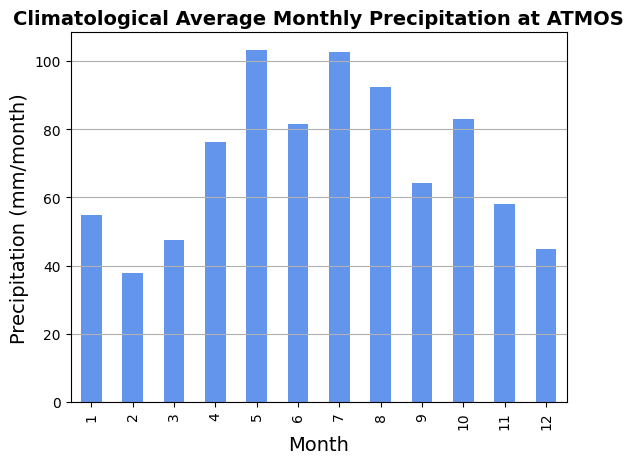

In [141]:
import matplotlib.pyplot as plt

# Assuming you have a pandas Series called "monthly_average_total_precip"

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data as a bar plot with the specified color
monthly_average_total_precip.plot.bar(ax=ax, color='cornflowerblue')

# Set the labels and title
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Precipitation (mm/month)', fontsize=14)
ax.set_title('Climatological Average Monthly Precipitation at ATMOS', fontweight='bold', fontsize=14)

# Show the grid on the y-axis
ax.grid(axis='y')

#Define the directory where you want to save the figure
save_directory = r'C:\Users\colwe\OneDrive\Desktop\Argonne\ATMOS_Tower_Data\Precip_Figures'

#Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

#Define the filename and full path to save the figure
filename = 'Climatological_Average_Monthly_3.png'
save_path = os.path.join(save_directory, filename)

#Save the figure as a .png in the specified directory
plt.savefig(save_path, dpi=300)

# Display the plot
plt.show()


<h2> Plots Diurnal Cycle

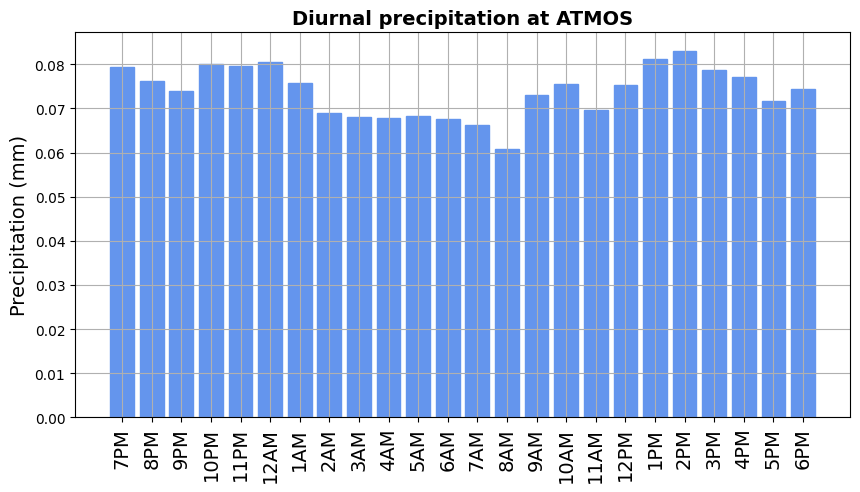

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 5))
bars = ax1.bar(np.arange(24), final_df.groupby(final_df.index.hour)['Precip'].mean(), color='cornflowerblue')
ax1.set_ylabel('Precipitation (mm)', fontsize=14)
ax1.set_title("Diurnal precipitation at ATMOS", fontweight="bold", fontsize=14)
plt.grid()
ax1.set_xticks([x for x in range(0, 24)])
x_ticks_labels = ['7PM', '8PM', '9PM', '10PM', '11PM', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM',
                  '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM']
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=14)

#Set the color of the bars to cornflowerblue
for bar in bars:
    bar.set_color('cornflowerblue')

#Define the directory where you want to save the figure
save_directory = r'C:\Users\colwe\OneDrive\Desktop\Argonne\ATMOS_Tower_Data\Precip_Figures'

#Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

#Define the filename and full path to save the figure
filename = 'Diurnal_Precip_Cycle_1.png'
save_path = os.path.join(save_directory, filename)

#Save the figure as a .png in the specified directory
plt.savefig(save_path, dpi=300)

#Show the plot
plt.show()

<h2> Plots Frequency of Daily Rainfall Amounts

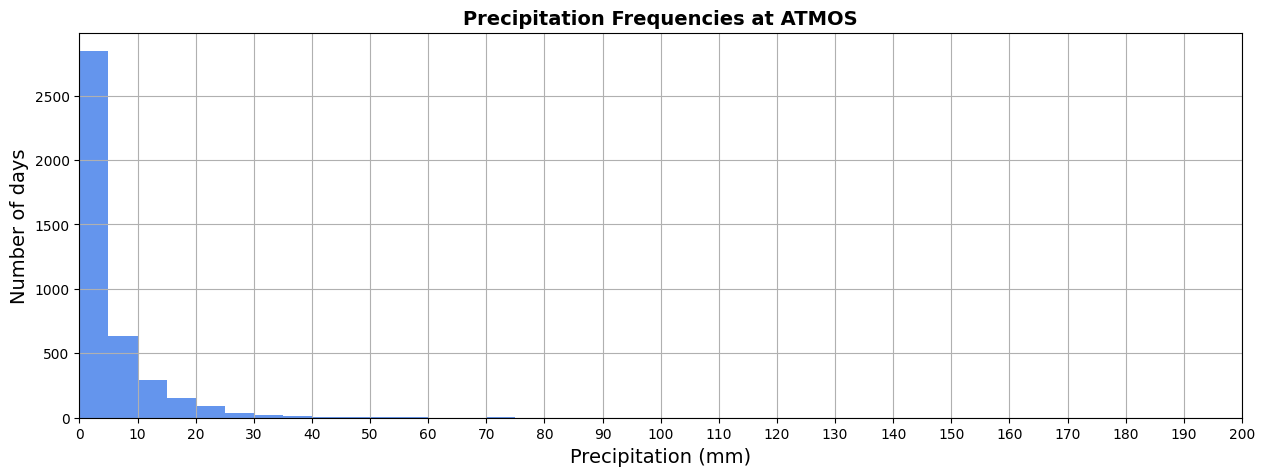

In [26]:
fig,ax1 = plt.subplots(figsize=(15,5))
daily_precip = final_df.resample('D')['Precip'].sum().values
daily_precip_gt0 = daily_precip[daily_precip > 0] # just plot the days when it rained
ax1.hist(daily_precip_gt0,bins =[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200], color='cornflowerblue')
plt.xticks(np.arange(0,210,10))
plt.grid()
plt.xlim([0,200])
ax1.set_ylabel('Number of days', fontsize =14)
ax1.set_xlabel('Precipitation (mm)', fontsize =14)
ax1.set_title("Precipitation Frequencies at ATMOS",fontweight="bold", fontsize=14)

#Define the directory where you want to save the figure
save_directory = r'C:\Users\colwe\OneDrive\Desktop\Argonne\ATMOS_Tower_Data\Precip_Figures'

#Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

#Define the filename and full path to save the figure
filename = 'Precipitation_Frequencies_at_ATMOS_1.png'
save_path = os.path.join(save_directory, filename)

#Save the figure as a .png in the specified directory
plt.savefig(save_path, dpi=300)
